# Sentiment Analysis

This notebook focuses on performing sentiment analysis on the previously downloaded articles using VADER (Valence Aware Dictionary and sEntiment Reasoner), a natural language processing (NLP) tool specifically designed for analyzing the sentiment of text. VADER is particularly effective for assessing sentiments in social media, news articles, and other textual data, as it combines a lexicon of pre-determined sentiment values with rules that handle the nuances of natural language.

Another tool widely used for analyzing especially financial articles is BERT or FinBERT, allowing bidirectional text processing and being trained specifically on financial datasets. Both tools were analyzed in this notebook.

The sentiment analysis results are later visualized alongside actual stock prices, enabling comparisons and insights into the relationship between article sentiment and market performance. These results are presented through detailed charts for better understanding.


In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
df2 = 0
ticker = "amzn" # Specify the ticker
filename = ticker + "_articles_dataset.pkl" # File name from of the articles file

# Sometimes Google Colab doesn't register the file (unpickling error), even if you uploaded it. Just delete it, upload again and run this cell again.
try:
    with open(filename, "rb") as file:
        df2 = pickle.load(file)
except pickle.UnpicklingError as e:
    print(f"Unpickling error: {e}")
except EOFError:
    print("Reached unexpected end of file. File might be corrupted.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df2

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/amazon-launches-...,"Nov 13, 2024",Amazon has launched a low-cost online storefro...
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/bra...,"Oct 23, 2024",(Bloomberg) — Brazil’s efforts to slow defores...
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/medical-king-rec...,"Nov 14, 2024","NEW YORK (AP) — About 222,000 adult bed assist..."
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/amazon-is...,"Dec 01, 2020",Amazon.com Inc. is laying the groundwork for a...
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/enthu...,"Nov 14, 2024",Reports Positive Adjusted EBITDA and Expanded ...
...,...,...,...,...,...
9875,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/bra...,"Mar 11, 2021",SAO PAULO — Hospitals in Brazil’s main cities ...
9876,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/goo...,"Aug 31, 2021","BRUSSELS — Alphabet Inc’s Google unit, Faceboo..."
9877,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/why...,"Feb 27, 2024",(Bloomberg) — Politicians are vowing to roll b...
9878,988,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/press-releases-p...,"Mar 29, 2023","TOKYO & CHESTERBROOK, Pa. — Boomi™, the intel..."


In [ ]:
df2["time"] = pd.to_datetime(df2["internals_dates"])
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,time
0,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/amazon-launches-...,"Nov 13, 2024",Amazon has launched a low-cost online storefro...,2024-11-13
1,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/business-pmn/bra...,"Oct 23, 2024",(Bloomberg) — Brazil’s efforts to slow defores...,2024-10-23
2,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/medical-king-rec...,"Nov 14, 2024","NEW YORK (AP) — About 222,000 adult bed assist...",2024-11-14
3,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/amazon-is...,"Dec 01, 2020",Amazon.com Inc. is laying the groundwork for a...,2020-12-01
4,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/enthu...,"Nov 14, 2024",Reports Positive Adjusted EBITDA and Expanded ...,2024-11-14


In [ ]:
df2 = df2.sort_values("time")
df2 = df2.set_index("time")
df2.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
time,,,,,
2014-11-27,14,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Nov 27, 2014",TORONTO • Walmart Canada is expanding its ‘gra...
2014-12-01,417,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...
2014-12-01,416,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...
2014-12-10,838,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...
2014-12-10,840,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...


In [ ]:
df2.dropna(inplace=True)

In [ ]:
# Sentiment analysis using VADER
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def add_sentiment_scores_vader(df, text_column):
    """
    Adds sentiment scores to a DataFrame based on a specified text column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing text data.
        text_column (str): The name of the column containing the text for analysis.

    Returns:
        pd.DataFrame: The original DataFrame with added sentiment score columns.
    """
    # Perform sentiment analysis for each row in the DataFrame
    df[['negative', 'neutral', 'positive', 'compound']] = df[text_column].apply(
        lambda text: pd.Series(analyzer.polarity_scores(text))
    )

    return df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd

# Load FinBERT model
finbert_model = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")

def add_sentiment_scores_finbert(df, text_column):
    """
    Adds sentiment scores to a DataFrame using the FinBERT model.

    Parameters:
        df (pd.DataFrame): The DataFrame containing text data.
        text_column (str): The name of the column containing the text for analysis.

    Returns:
        pd.DataFrame: The original DataFrame with added sentiment score columns.
    """
    def analyze_long_text(text):
        if not isinstance(text, str) or text.strip() == "":
            # Handle missing or invalid text
            return pd.Series({'positive': 0, 'negative': 0, 'neutral': 1, 'compound': 0})

        # Split text into chunks of approximately 512 characters
        chunks = [text[i:i + 512] for i in range(0, len(text), 512)]

        # Get sentiment probabilities for each chunk
        results = finbert_model(chunks)

        # Aggregate probabilities
        total_scores = {"positive": 0, "negative": 0, "neutral": 0}
        for result in results:
            label = result["label"].lower()  # 'positive', 'negative', 'neutral'
            total_scores[label] += result["score"]

        # Normalize scores
        total = sum(total_scores.values())
        for key in total_scores:
            total_scores[key] /= total

        # Compound score: positive - negative
        compound = total_scores["positive"] - total_scores["negative"]

        return pd.Series({
            "positive": total_scores.get("positive", 0),
            "negative": total_scores.get("negative", 0),
            "neutral": total_scores.get("neutral", 0),
            "compound": compound
        })

    # Apply the function to the DataFrame
    sentiment_columns = df[text_column].apply(analyze_long_text)
    sentiment_columns.columns = ['positive', 'negative', 'neutral', 'compound']

    # Merge with the original DataFrame
    return pd.concat([df.reset_index(drop=True), sentiment_columns.reset_index(drop=True)], axis=1)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
text_2 = df2["internals_text"][0]
text_2

<ipython-input-9-8e67488739e7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text_2 = df2["internals_text"][0]


'TORONTO • Walmart Canada is expanding its ‘grab and go’ locker pickup system for online orders just in time for Christmas, beating Amazon Canada to the punch. Walmart began testing a locker system for web customers at 10 Toronto-area stores in August, offering it as an alternative to home delivery. It allows customers to pickup the goods at a locked unit with a personal PIN code tied to their order, thereby skipping cash register lines and in-store shopping time. On the strength of the early pilot, Walmart is now expanding the project to 33 other Toronto-area stores between now and Dec. 5, before targeting a gradual rollout to other Canadian markets over the next 18 months. “Certain stores and areas will use the service more frequently and more often, so that is how we are planning our rollout,” said Gino DiGioacchino, executive vice-president of e-commerce and chief of operations at Walmart Canada. The strategy comes as the country’s biggest mass merchant looks to limit competition f

In [ ]:
print(df2.columns)

Index(['n_of_page', 'principal_url', 'internal_urls', 'internals_dates',
       'internals_text'],
      dtype='object')


In [ ]:
# Replace empty spaces with NaN (null values) in 'internals_dates' column
df2['internals_dates'] = df2['internals_dates'].replace(r'^\s*$', pd.NA, regex=True)

# Drop all rows where 'internals_dates' is null (NaN)
df2_cleaned = df2.dropna(subset=['internals_dates'])

# Display or further process the cleaned DataFrame
df2_cleaned

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
time,,,,,
2014-11-27,14,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Nov 27, 2014",TORONTO • Walmart Canada is expanding its ‘gra...
2014-12-01,417,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...
2014-12-01,416,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...
2014-12-10,838,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...
2014-12-10,840,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...
...,...,...,...,...,...
2024-11-13,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/amazon-launches-...,"Nov 13, 2024",Amazon has launched a low-cost online storefro...
2024-11-14,2,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/singi...,"Nov 14, 2024",Karaoke partnership will provide fully-feature...
2024-11-14,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/mikra...,"Nov 14, 2024","TORONTO, Nov. 14, 2024 (GLOBE NEWSWIRE) — Life..."


In [ ]:
head = df2_cleaned.tail()
head

,n_of_page,principal_url,internal_urls,internals_dates,internals_text
time,,,,,
2024-11-13,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/amazon-launches-...,"Nov 13, 2024",Amazon has launched a low-cost online storefro...
2024-11-14,2,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/singi...,"Nov 14, 2024",Karaoke partnership will provide fully-feature...
2024-11-14,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/mikra...,"Nov 14, 2024","TORONTO, Nov. 14, 2024 (GLOBE NEWSWIRE) — Life..."
2024-11-14,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/enthu...,"Nov 14, 2024",Reports Positive Adjusted EBITDA and Expanded ...
2024-11-14,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/medical-king-rec...,"Nov 14, 2024","NEW YORK (AP) — About 222,000 adult bed assist..."


In [ ]:
# Key part of the notebook - adding sentiment columns
df_with_sentiment = add_sentiment_scores_vader(df2_cleaned, 'internals_text')
df_with_sentiment

<ipython-input-7-db197e8b3860>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['negative', 'neutral', 'positive', 'compound']] = df[text_column].apply(
<ipython-input-7-db197e8b3860>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['negative', 'neutral', 'positive', 'compound']] = df[text_column].apply(
<ipython-input-7-db197e8b3860>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,negative,neutral,positive,compound
time,,,,,,,,,
2014-11-27,14,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Nov 27, 2014",TORONTO • Walmart Canada is expanding its ‘gra...,0.015,0.911,0.074,0.9923
2014-12-01,417,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...,0.094,0.811,0.095,-0.2732
2014-12-01,416,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...,0.094,0.811,0.095,-0.2732
2014-12-10,838,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...,0.028,0.857,0.115,0.9953
2014-12-10,840,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...,0.028,0.857,0.115,0.9953
...,...,...,...,...,...,...,...,...,...
2024-11-13,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/amazon-launches-...,"Nov 13, 2024",Amazon has launched a low-cost online storefro...,0.027,0.900,0.073,0.9668
2024-11-14,2,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/singi...,"Nov 14, 2024",Karaoke partnership will provide fully-feature...,0.011,0.902,0.087,0.9980
2024-11-14,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/mikra...,"Nov 14, 2024","TORONTO, Nov. 14, 2024 (GLOBE NEWSWIRE) — Life...",0.017,0.732,0.251,0.9988


In [ ]:
# Play around with data - Filter and display the first 5 records where 'compound' is less than -0.5
negative_sentiment_records = df_with_sentiment[df_with_sentiment['compound'] < -0.5].head(5)
negative_sentiment_records

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,negative,neutral,positive,compound
time,,,,,,,,,
2015-04-30,25,https://financialpost.com/search/?search_text=...,https://financialpost.com/opinion/nota-bene-re...,"Apr 30, 2015",From the Amazon description of Wasting a Crisi...,0.158,0.736,0.105,-0.9588
2015-08-20,10,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/boycott-a...,"Aug 20, 2015",A New York Times’ expose of working conditions...,0.124,0.751,0.125,-0.8620
2015-08-21,63,https://financialpost.com/search/?search_text=...,https://financialpost.com/executive/executive-...,"Aug 21, 2015",Good morning. Here’s your executive summary of...,0.092,0.839,0.069,-0.9822
2015-09-21,864,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/cio/airdr...,"Sep 21, 2015",It’s been a bad week for Google Inc.’s Android...,0.101,0.829,0.070,-0.9674
2015-10-09,92,https://financialpost.com/search/?search_text=...,https://financialpost.com/executive/executive-...,"Oct 09, 2015",Good morning. Amazon goes artisanal and Etsy.c...,0.097,0.807,0.095,-0.7372


In [ ]:
# Save the file with sentiment from articles - we need it for the next chapter - Visualization of the sentiment
save_filename = ticker + "_sentiment.pkl"
df_with_sentiment.to_pickle(save_filename)

# Visualization of the sentiment

In [ ]:
import pickle
df_text = 0
ticker = "amzn"
save_filename = ticker + "_sentiment.pkl"

with open(save_filename, "rb") as file:
    df_text = pickle.load(file)

df_text

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,negative,neutral,positive,compound
time,,,,,,,,,
2014-11-27,14,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Nov 27, 2014",TORONTO • Walmart Canada is expanding its ‘gra...,0.015,0.911,0.074,0.9923
2014-12-01,417,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...,0.094,0.811,0.095,-0.2732
2014-12-01,416,https://financialpost.com/search/?search_text=...,https://financialpost.com/technology/personal-...,"Dec 01, 2014",It’s the busiest time of year for Amazon.com I...,0.094,0.811,0.095,-0.2732
2014-12-10,838,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...,0.028,0.857,0.115,0.9953
2014-12-10,840,https://financialpost.com/search/?search_text=...,https://financialpost.com/news/retail-marketin...,"Dec 10, 2014",NEW YORK — If you still have Disney’s Frozen C...,0.028,0.857,0.115,0.9953
...,...,...,...,...,...,...,...,...,...
2024-11-13,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/pmn/amazon-launches-...,"Nov 13, 2024",Amazon has launched a low-cost online storefro...,0.027,0.900,0.073,0.9668
2024-11-14,2,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/singi...,"Nov 14, 2024",Karaoke partnership will provide fully-feature...,0.011,0.902,0.087,0.9980
2024-11-14,1,https://financialpost.com/search/?search_text=...,https://financialpost.com/globe-newswire/mikra...,"Nov 14, 2024","TORONTO, Nov. 14, 2024 (GLOBE NEWSWIRE) — Life...",0.017,0.732,0.251,0.9988


In [ ]:
# Reset the index to make 'time' a regular column
df_text = df_text.reset_index()

# Now select only the 'time' and 'compound' columns
df_text = df_text[['time', 'compound']]

df_text

,time,compound
0,2014-11-27,0.9923
1,2014-12-01,-0.2732
2,2014-12-01,-0.2732
3,2014-12-10,0.9953
4,2014-12-10,0.9953
...,...,...
9874,2024-11-13,0.9668
9875,2024-11-14,0.9980
9876,2024-11-14,0.9988
9877,2024-11-14,0.9951


In [ ]:
# Group by 'time' and aggregate 'compound' values into a list
df_text = df_text.groupby('time')['compound'].apply(list).reset_index()

# Display the result
df_text


,time,compound
0,2014-11-27,[0.9923]
1,2014-12-01,"[-0.2732, -0.2732]"
2,2014-12-10,"[0.9953, 0.9953]"
3,2014-12-12,"[0.9952, 0.9952]"
4,2015-01-13,"[-0.2987, -0.2987]"
...,...,...
2133,2024-11-08,"[0.9987, 0.9939, 0.9971]"
2134,2024-11-11,[0.5979]
2135,2024-11-12,"[0.7823, 0.9994]"
2136,2024-11-13,"[0.9987, 0.9913, 0.9943, 0.9991, 0.9993, 0.9668]"


In [ ]:
# Calculate the average of the compound arrays and store it in a new column 'avg_compound'
df_text['avg_compound'] = df_text['compound'].apply(lambda x: sum(x) / len(x))

# Display the result
df_text


,time,compound,avg_compound
0,2014-11-27,[0.9923],0.992300
1,2014-12-01,"[-0.2732, -0.2732]",-0.273200
2,2014-12-10,"[0.9953, 0.9953]",0.995300
3,2014-12-12,"[0.9952, 0.9952]",0.995200
4,2015-01-13,"[-0.2987, -0.2987]",-0.298700
...,...,...,...
2133,2024-11-08,"[0.9987, 0.9939, 0.9971]",0.996567
2134,2024-11-11,[0.5979],0.597900
2135,2024-11-12,"[0.7823, 0.9994]",0.890850
2136,2024-11-13,"[0.9987, 0.9913, 0.9943, 0.9991, 0.9993, 0.9668]",0.991583


In [ ]:
# Set 'time' as the index
df_text = df_text.set_index('time')

# Display the updated DataFrame
df_text


,compound,avg_compound
time,,
2014-11-27,[0.9923],0.992300
2014-12-01,"[-0.2732, -0.2732]",-0.273200
2014-12-10,"[0.9953, 0.9953]",0.995300
2014-12-12,"[0.9952, 0.9952]",0.995200
2015-01-13,"[-0.2987, -0.2987]",-0.298700
...,...,...
2024-11-08,"[0.9987, 0.9939, 0.9971]",0.996567
2024-11-11,[0.5979],0.597900
2024-11-12,"[0.7823, 0.9994]",0.890850


In [ ]:
# Save df_text with only avg_compound sentiment from articles - we need it for notebook no. 4
compound_savefile = ticker + "_sentiment_avg_compound.pkl"
df_text.to_pickle(compound_savefile)


In [ ]:
# Here we need our historical_prices.pkl

import matplotlib.pyplot as plt

df_values = 0
with open("historical_prices.pkl", "rb") as file:
    df_values = pickle.load(file)

df_values.head()

Ticker,AMZN,JNJ,KO,MSFT,NVDA,PG
2014-11-17,16.1525,82.302917,31.250521,42.289249,0.470863,66.312943
2014-11-18,16.2465,82.705711,31.694668,41.936470,0.482097,66.396004
2014-11-19,16.3270,82.652504,32.197067,41.489052,0.480296,66.984833
2014-11-20,16.5270,82.211716,32.218903,41.902054,0.488217,66.788559
2014-11-21,16.6315,82.502388,32.400936,41.282547,0.490858,66.886673


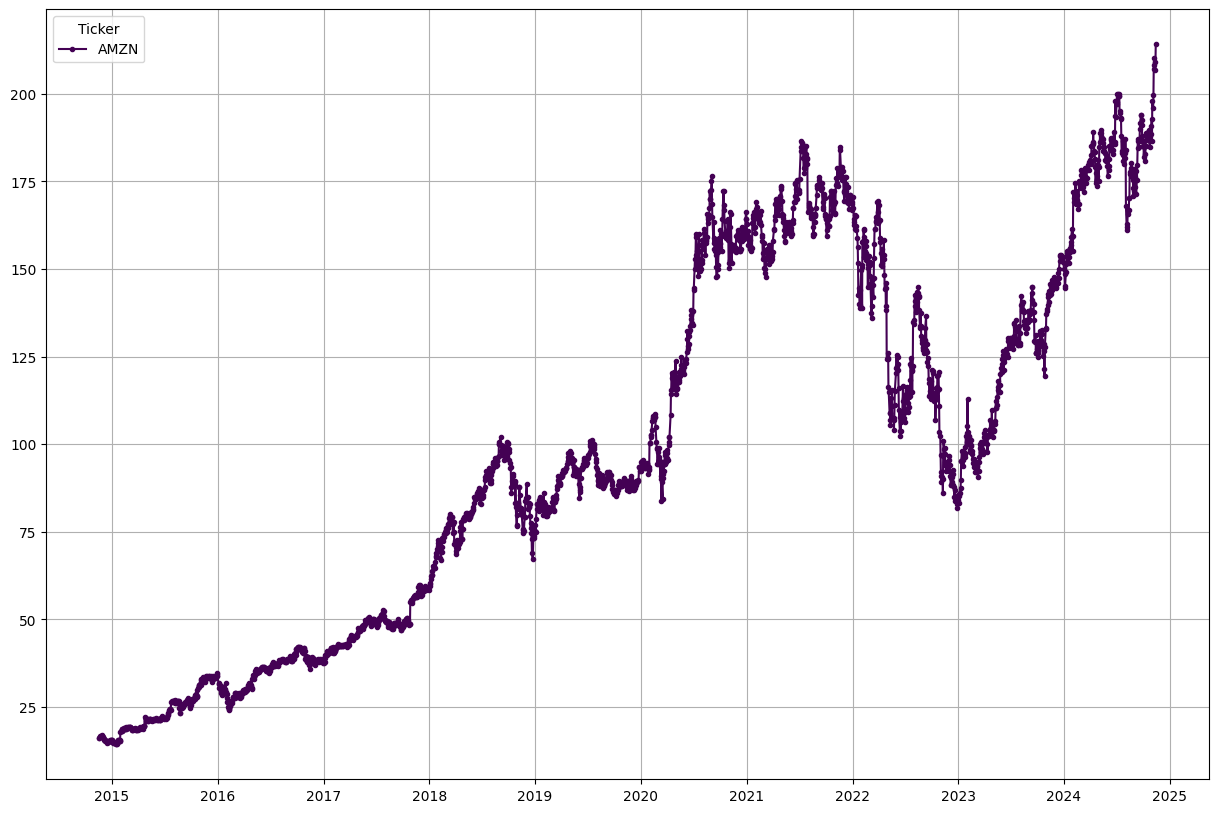

In [ ]:
ticker_up = "AMZN" # Specify the ticker in uppercase
prices_df = df_values[[ticker_up]]
prices_df.plot(cmap = "viridis",linestyle='-',figsize = (15,10),marker='.')
plt.grid()
plt.show()

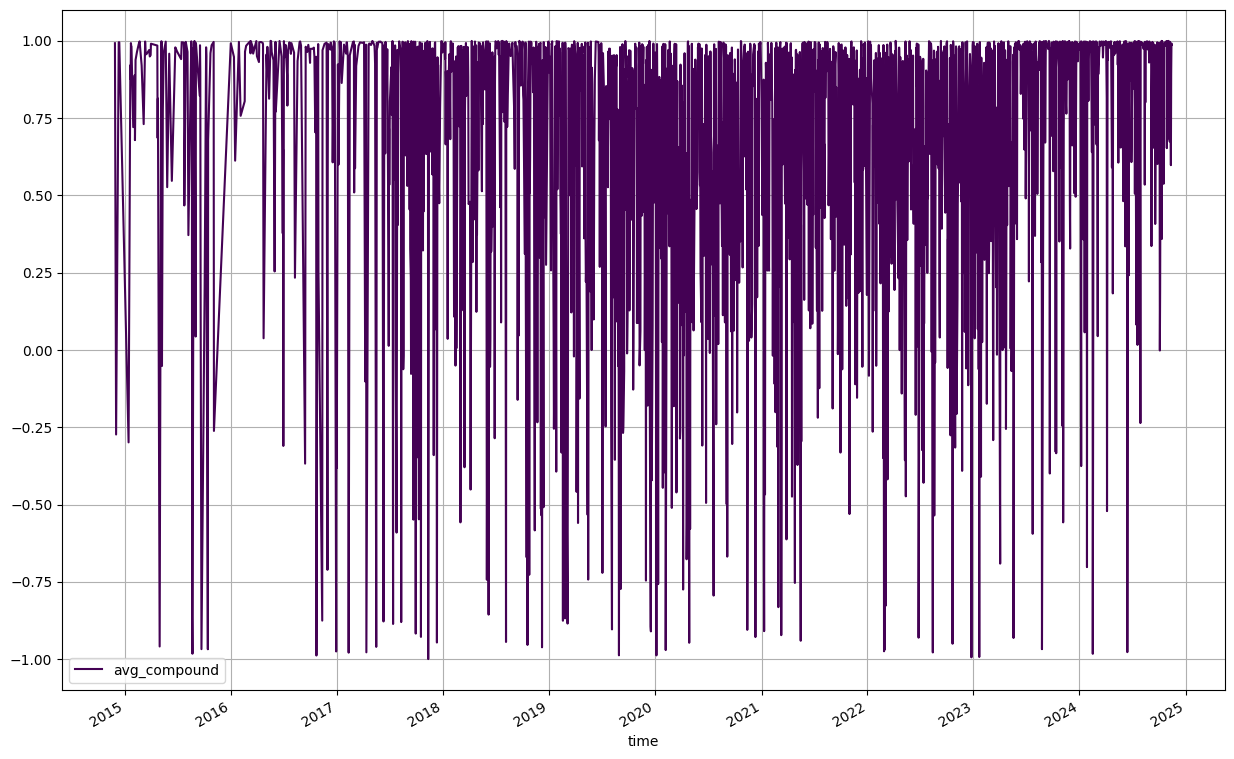

In [ ]:
df_text[["avg_compound"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

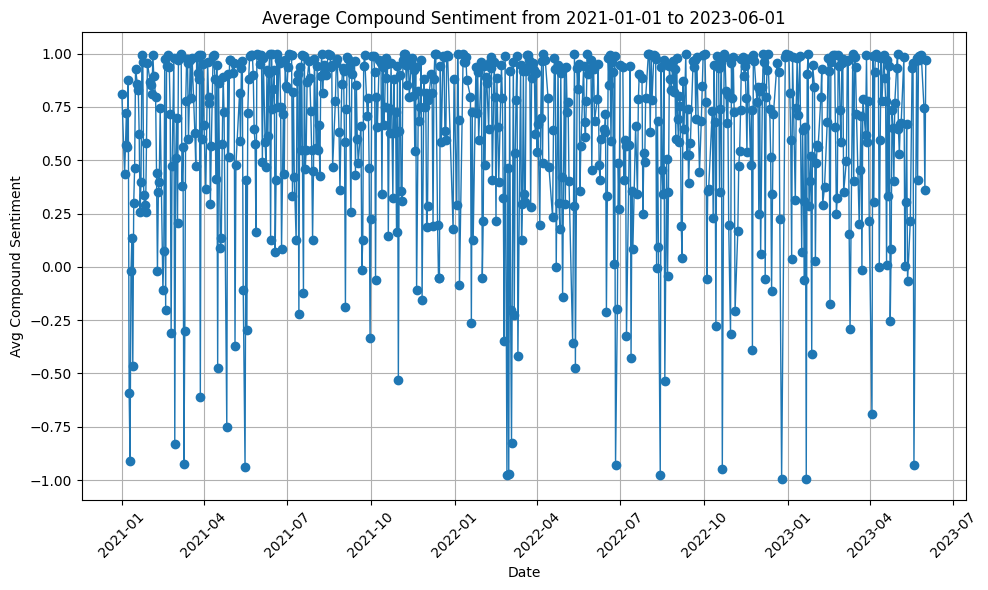

In [ ]:
# Filter the DataFrame for the specified date range
filtered_df = df_text.loc["2021-01-01":"2023-06-01"]

# Plot avg_compound over the specified time range
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['avg_compound'], marker='o', linestyle='-', linewidth=1)
plt.title("Average Compound Sentiment from 2021-01-01 to 2023-06-01")
plt.xlabel("Date")
plt.ylabel("Avg Compound Sentiment")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Resample df_text to weekly frequency, calculating the mean of avg_compound for each week
weekly_sentiment = df_text['avg_compound'].resample('M').mean()

# Convert the result to a DataFrame
weekly_sentiment_df = weekly_sentiment.to_frame(name='weekly_avg_compound')

# Display the weekly sentiment DataFrame
weekly_sentiment_df


<ipython-input-27-9b95bcfb4eff>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weekly_sentiment = df_text['avg_compound'].resample('M').mean()


,weekly_avg_compound
time,
2014-11-30,0.992300
2014-12-31,0.572433
2015-01-31,0.739619
2015-02-28,0.893925
2015-03-31,0.938281
...,...
2024-07-31,0.822494
2024-08-31,0.958098
2024-09-30,0.815517


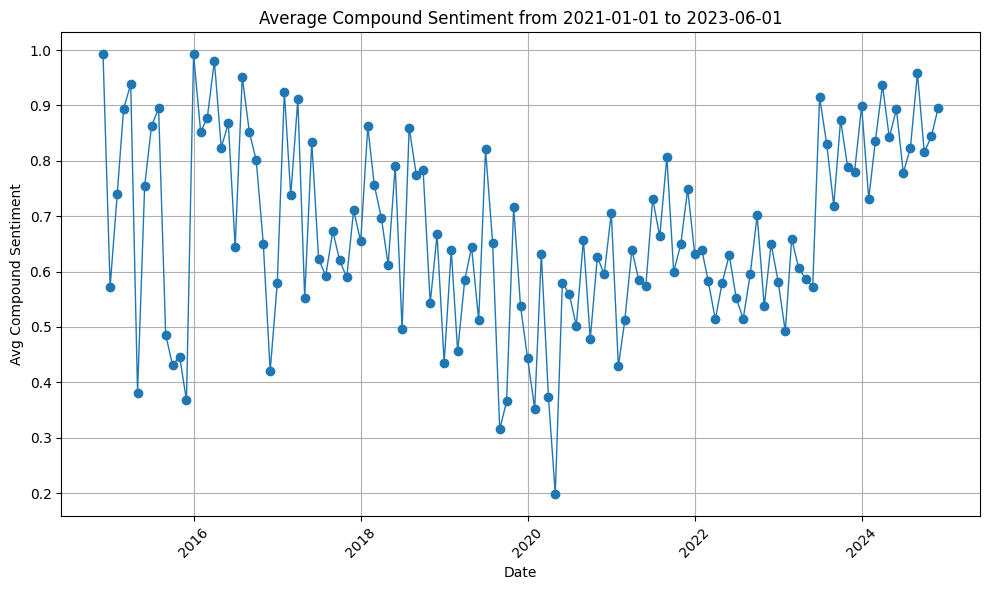

In [ ]:
# Filter the DataFrame for the specified date range
filtered_df = weekly_sentiment_df

# Plot avg_compound over the specified time range
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['weekly_avg_compound'], marker='o', linestyle='-', linewidth=1)
plt.title("Average Compound Sentiment from 2021-01-01 to 2023-06-01")
plt.xlabel("Date")
plt.ylabel("Avg Compound Sentiment")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-29-82b05c1dbced>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weekly_sentiment = df_text['avg_compound'].resample('M').mean()


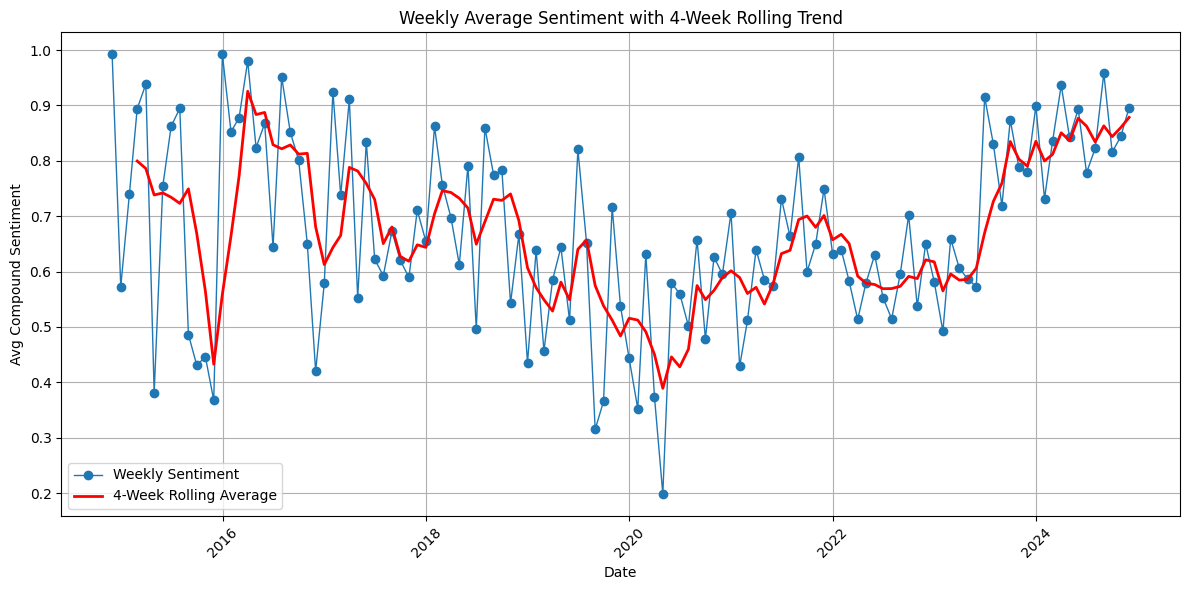

In [ ]:
# Resample df_text to get weekly sentiment averages
weekly_sentiment = df_text['avg_compound'].resample('M').mean()

# Calculate a 4-week rolling average for smoother trend visualization
rolling_avg = weekly_sentiment.rolling(window=4).mean()

# Plot the weekly sentiment along with the 4-week rolling average
plt.figure(figsize=(12, 6))
plt.plot(weekly_sentiment.index, weekly_sentiment, label="Weekly Sentiment", marker='o', linestyle='-', linewidth=1)
plt.plot(weekly_sentiment.index, rolling_avg, label="4-Week Rolling Average", color='red', linewidth=2)

# Add titles and labels
plt.title("Weekly Average Sentiment with 4-Week Rolling Trend")
plt.xlabel("Date")
plt.ylabel("Avg Compound Sentiment")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting both sentiment and prices

Now, let's visually explore the relationship between sentiment and actual stock prices.

An interesting observation arises during the years 2022–2024, where both prices and sentiment data appear to align particularly well.

A noticeable trend emerges: after 2020, sentiment data seems to correlate more closely with stock prices for many companies. What might this indicate? Could it suggest that investors are increasingly relying on articles and sentiment (fundamental analysis) rather than solely on market data and price patterns (technical analysis)?

It's important to note, however, that even though sentiment data tends to be really volatile, it's still less volatile than return-on-the-next-day data, which will be shown in the next notebook. Drastic market shifts often occur due to very positive/very negative news, however daily changes are often unpredictable just based on articles.

 This slightly limits sentiment utility for day-to-day trading strategies but makes it potentially valuable for long-term price predictions, as it can help identify broader trends in the data, especially after 2020, as shown on the charts.

<ipython-input-30-8568bec2ec08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_df["Normalized_Price"] = scaler.fit_transform(prices_df[[ticker_up]])


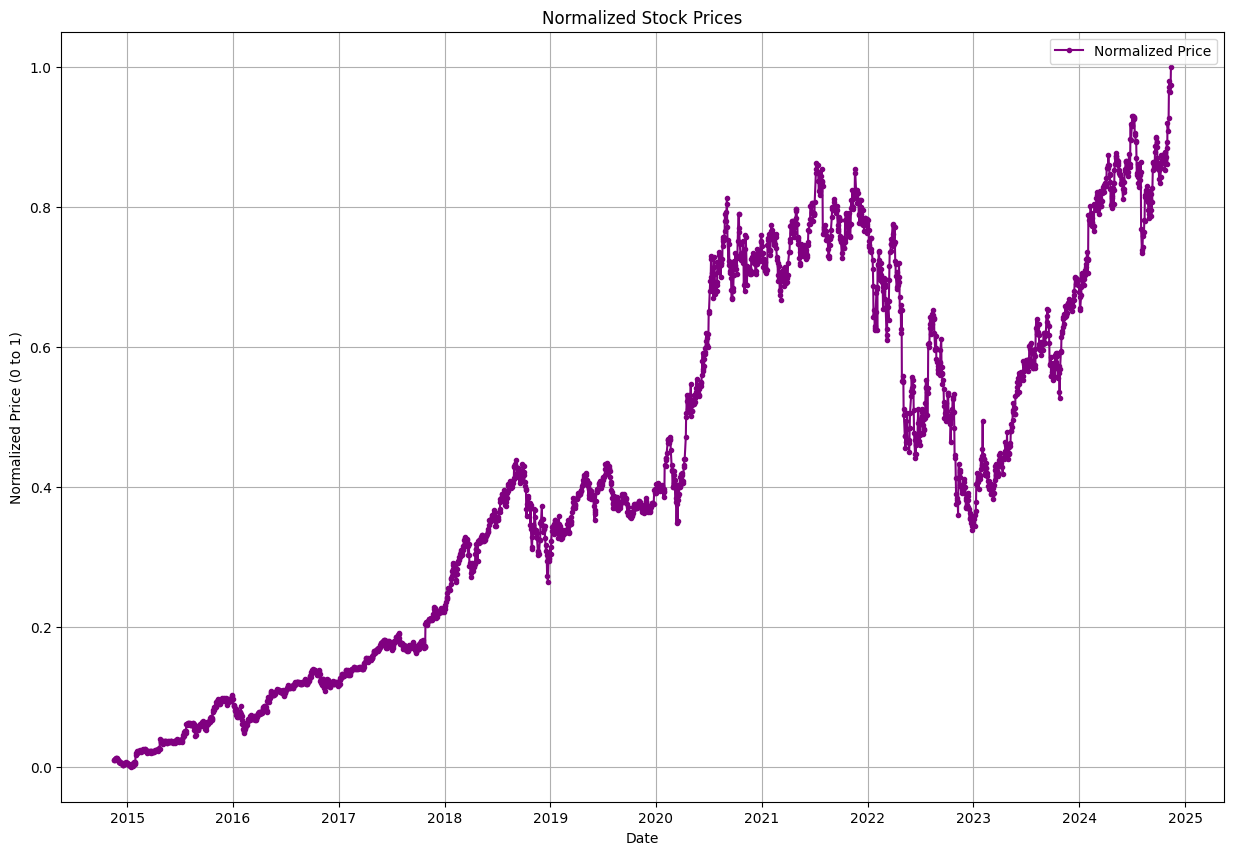

In [ ]:
# First, we need to scale the prices.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
prices_df["Normalized_Price"] = scaler.fit_transform(prices_df[[ticker_up]])

# Plot the normalized prices
plt.figure(figsize=(15, 10))
plt.plot(prices_df.index, prices_df["Normalized_Price"], linestyle='-', marker='.', color='purple', label="Normalized Price")
plt.title("Normalized Stock Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Price (0 to 1)")
plt.grid(True)
plt.legend()
plt.show()

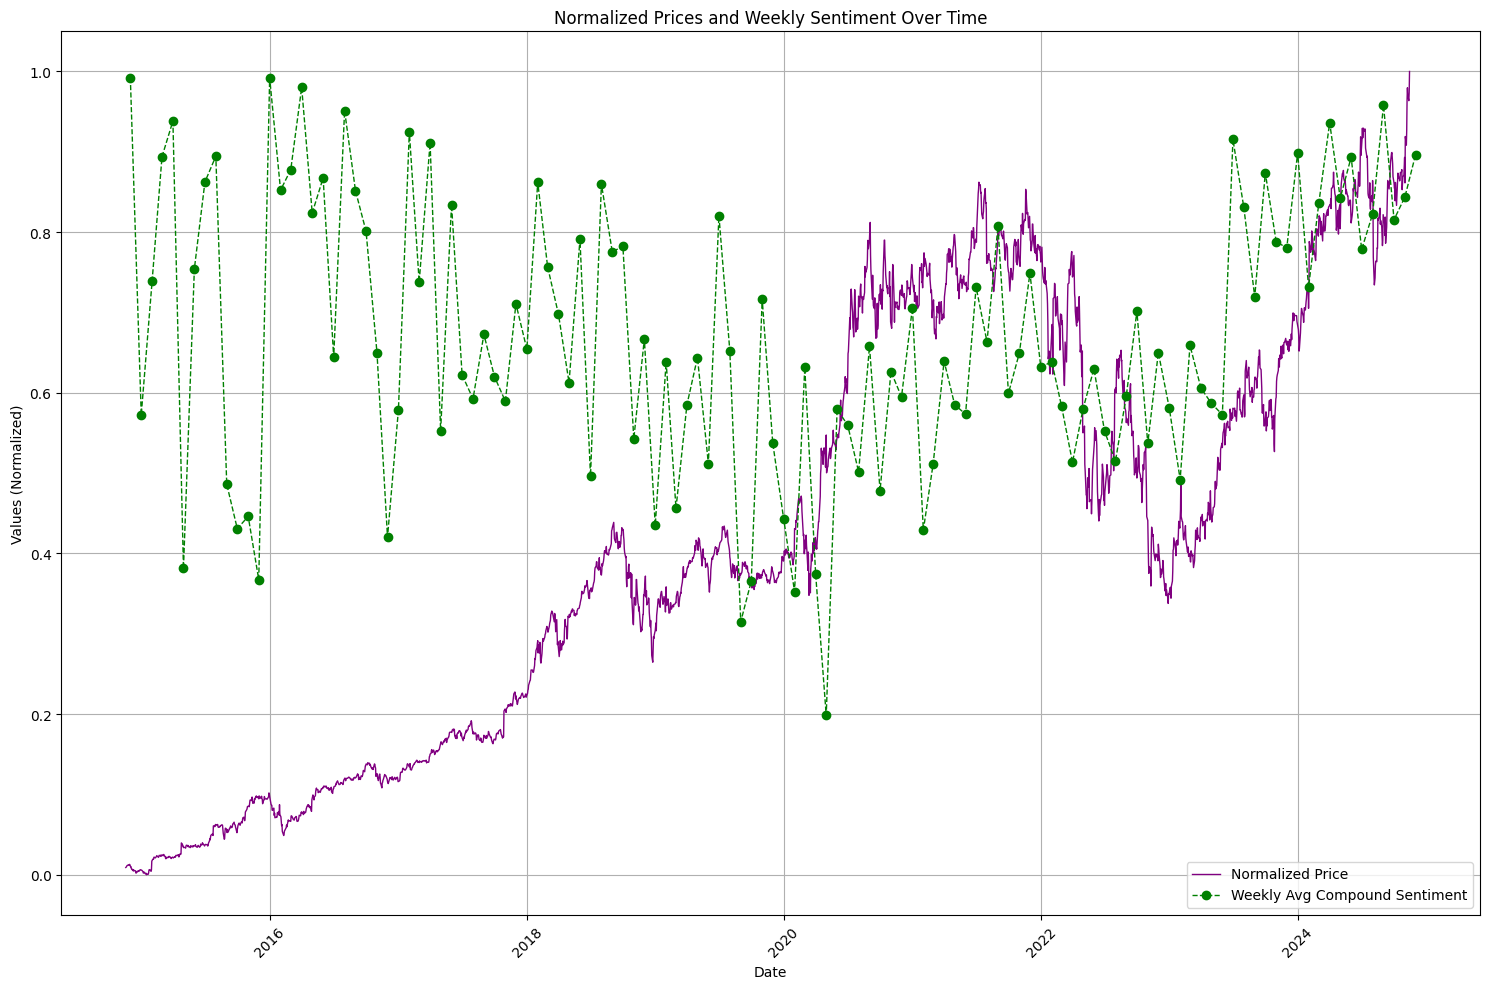

In [ ]:
# Plot both the normalized prices and sentiment values
plt.figure(figsize=(15, 10))

# Plot normalized prices
plt.plot(prices_df.index, prices_df["Normalized_Price"], label="Normalized Price", color='purple', linestyle='-', linewidth=1)

# Plot weekly average compound sentiment
plt.plot(weekly_sentiment_df.index, weekly_sentiment_df["weekly_avg_compound"], label="Weekly Avg Compound Sentiment", color='green', linestyle='--', marker='o', linewidth=1)

# Add title, labels, legend, and grid
plt.title("Normalized Prices and Weekly Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Values (Normalized)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


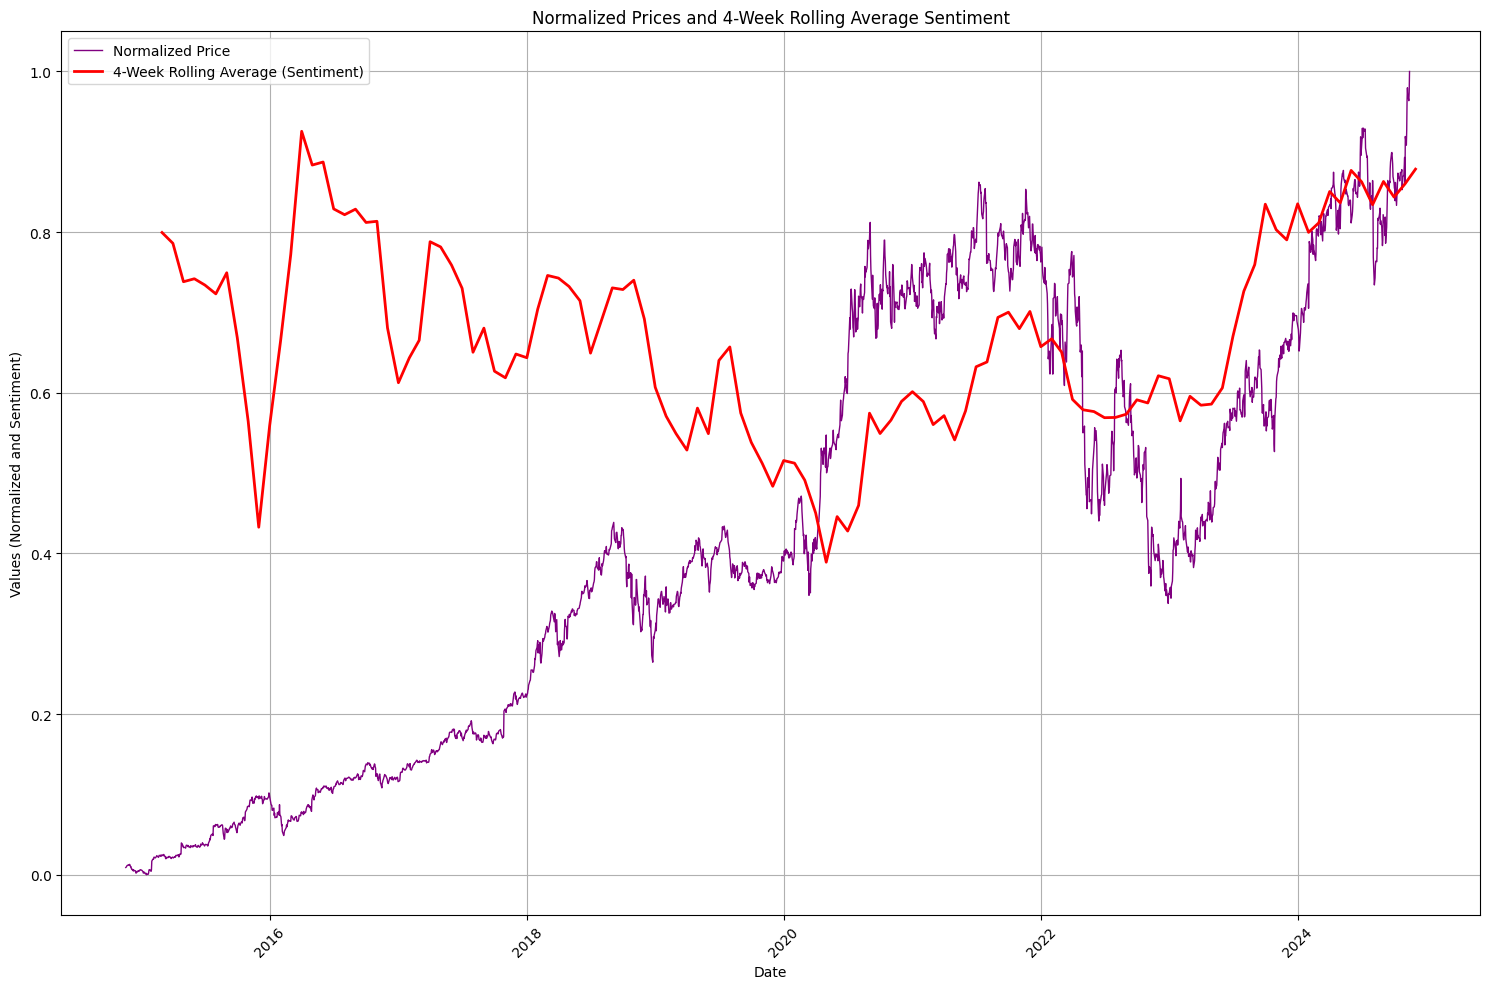

In [ ]:
# Plot normalized prices and 4-week rolling average sentiment
plt.figure(figsize=(15, 10))

# Plot normalized prices
plt.plot(prices_df.index, prices_df["Normalized_Price"], label="Normalized Price", color='purple', linestyle='-', linewidth=1)

# Plot 4-week rolling average of sentiment
rolling_avg = weekly_sentiment.rolling(window=4).mean()
plt.plot(weekly_sentiment.index, rolling_avg, label="4-Week Rolling Average (Sentiment)", color='red', linewidth=2)

# Add titles, labels, legend, and grid
plt.title("Normalized Prices and 4-Week Rolling Average Sentiment")
plt.xlabel("Date")
plt.ylabel("Values (Normalized and Sentiment)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Not all simulations help us see a trend. 16-week rolling window is too much to let us see a relationship, however, after various attempts, it seems like the weekly average and 4-week rolling window help us see more.

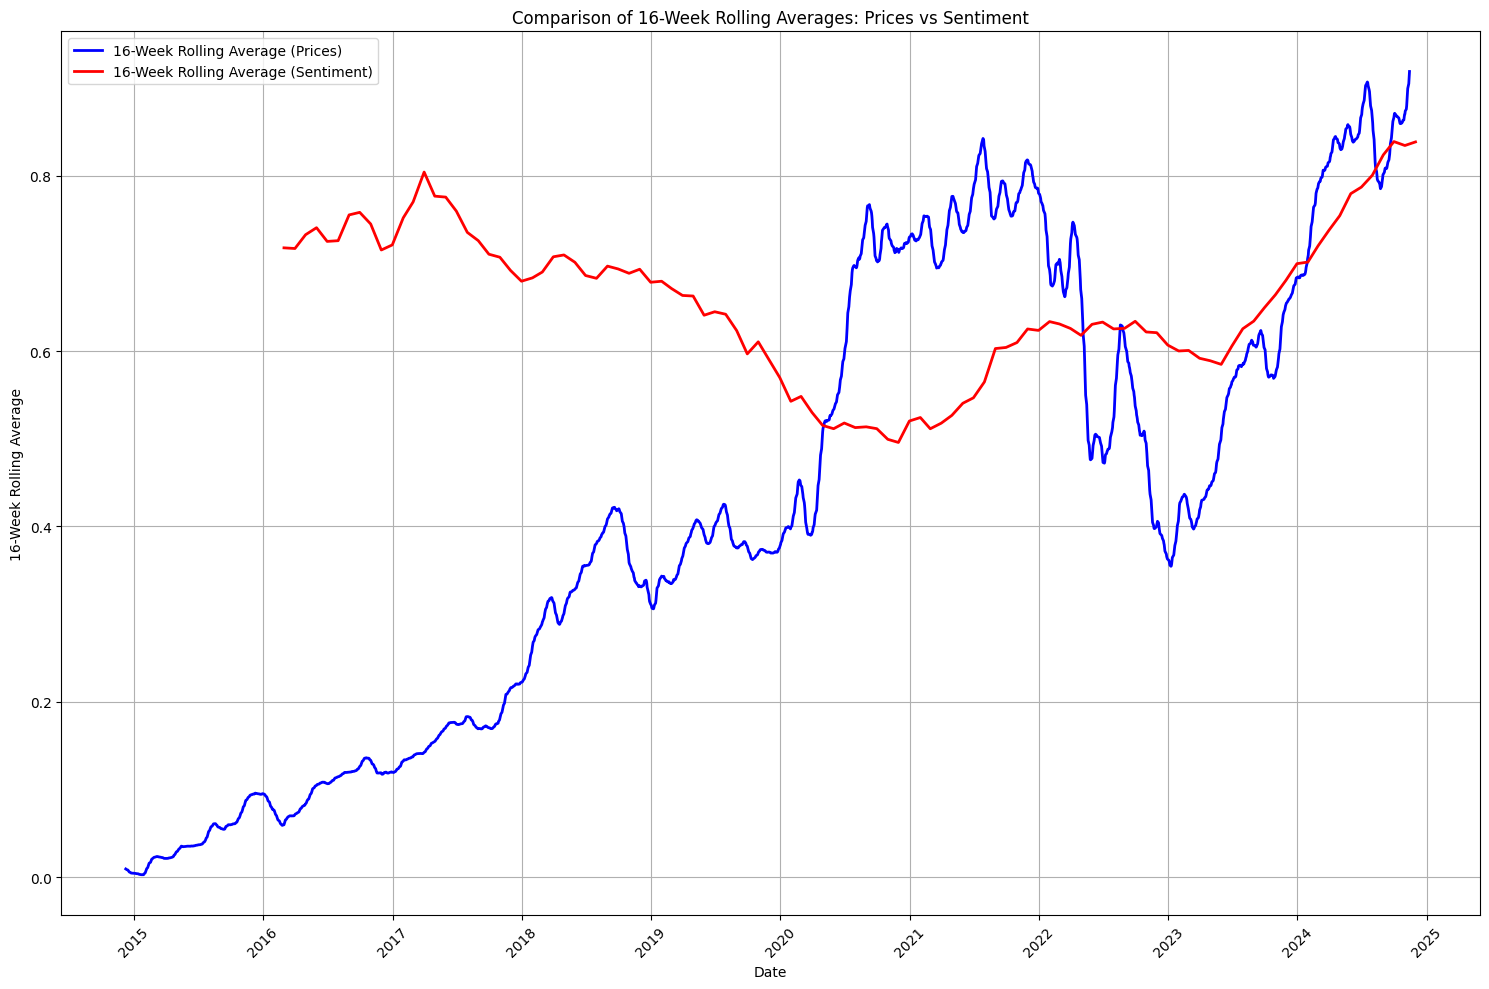

In [ ]:
# Calculate 16-week rolling averages for normalized prices and sentiment for smoother trends
price_rolling_avg = prices_df["Normalized_Price"].rolling(window=16).mean()
sentiment_rolling_avg = weekly_sentiment.rolling(window=16).mean()

# Plot the 16-week rolling averages
plt.figure(figsize=(15, 10))

# Plot 16-week rolling average of normalized prices
plt.plot(prices_df.index, price_rolling_avg, label="16-Week Rolling Average (Prices)", color='blue', linewidth=2)

# Plot 16-week rolling average of sentiment
plt.plot(weekly_sentiment.index, sentiment_rolling_avg, label="16-Week Rolling Average (Sentiment)", color='red', linewidth=2)

# Add titles, labels, legend, and grid
plt.title("Comparison of 16-Week Rolling Averages: Prices vs Sentiment")
plt.xlabel("Date")
plt.ylabel("16-Week Rolling Average")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


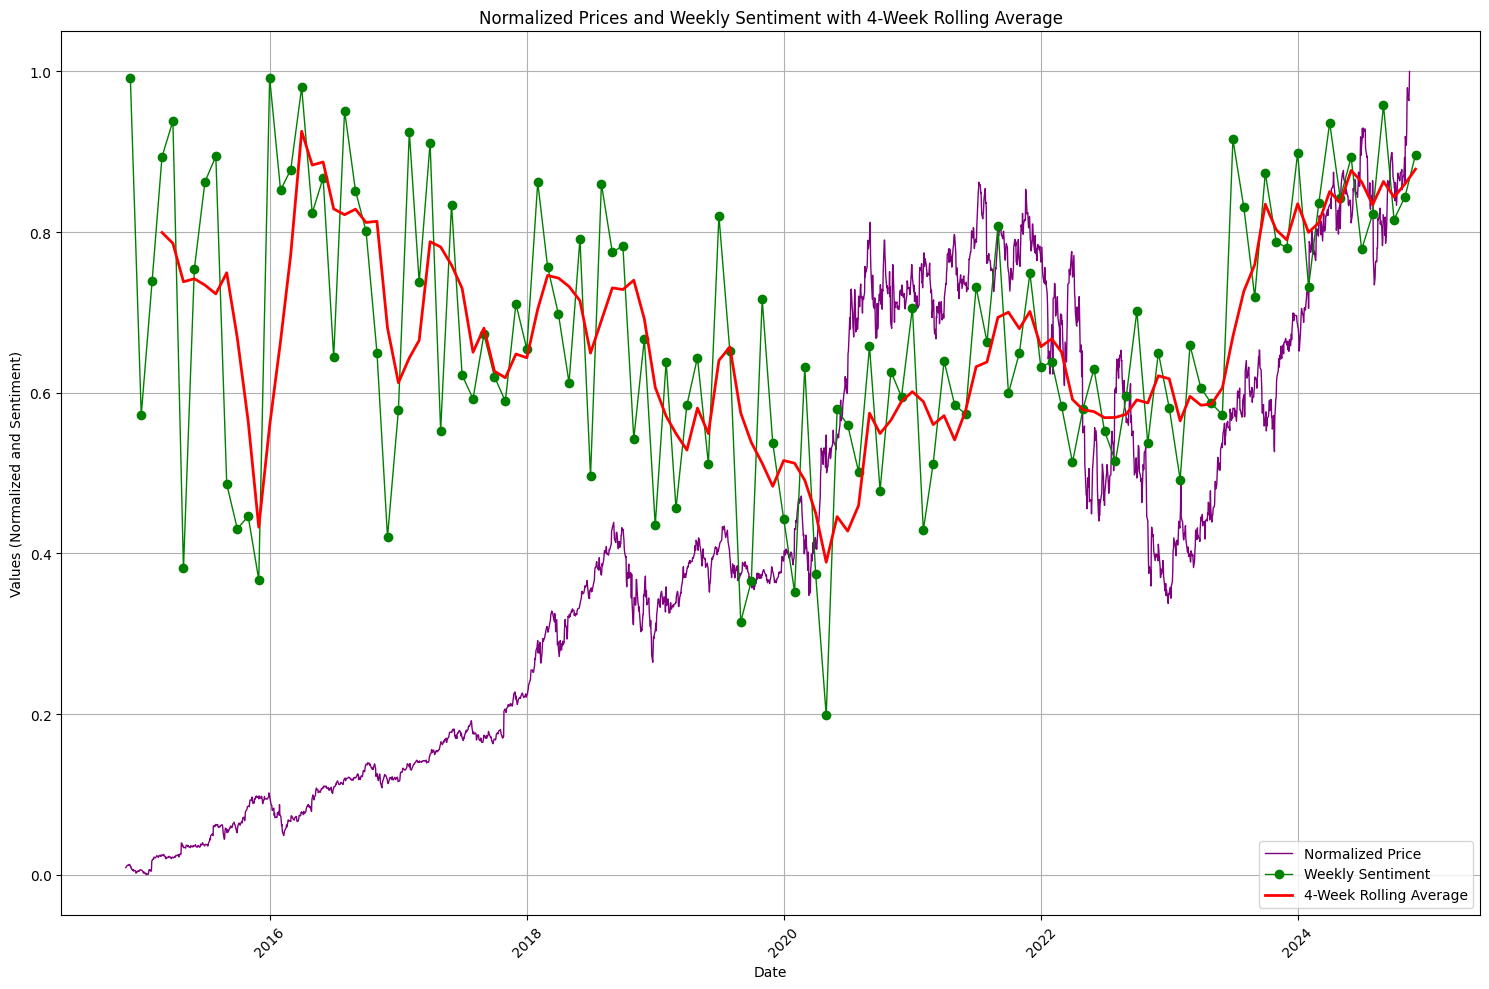

In [ ]:
# Plot normalized prices along with weekly sentiment and 4-week rolling average
plt.figure(figsize=(15, 10))

# Plot normalized prices
plt.plot(prices_df.index, prices_df["Normalized_Price"], label="Normalized Price", color='purple', linestyle='-', linewidth=1)

# Plot weekly sentiment
plt.plot(weekly_sentiment.index, weekly_sentiment, label="Weekly Sentiment", color='green', marker='o', linestyle='-', linewidth=1)

# Plot 4-week rolling average of sentiment
rolling_avg = weekly_sentiment.rolling(window=4).mean()
plt.plot(weekly_sentiment.index, rolling_avg, label="4-Week Rolling Average", color='red', linewidth=2)

# Add titles, labels, legend, and grid
plt.title("Normalized Prices and Weekly Sentiment with 4-Week Rolling Average")
plt.xlabel("Date")
plt.ylabel("Values (Normalized and Sentiment)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
